# Envie Data Cleaning
**Data timeframe: October 04, 2024 - December 04, 2024**

# Table Definition

* Affiliate_DIM - table for unique affiliates (affiliate_IDs CANNOT repeat)
* Affiliate_History_DIM - historical data of each affiliate (affiliate_IDs can repeat)
* Video_DIM - table for TikTok videos
* Comment_DIM - table for TikTok video comments
* Sales_DIM - table for completed orders
* Sales_Details_DIM - items purchased in each order
* Time_DIM - table for date and DOTW
* Customer_DIM - table for customers

Go to pages 106 to 110 to view definitions (columns, data types, descriptions) of each DIM table

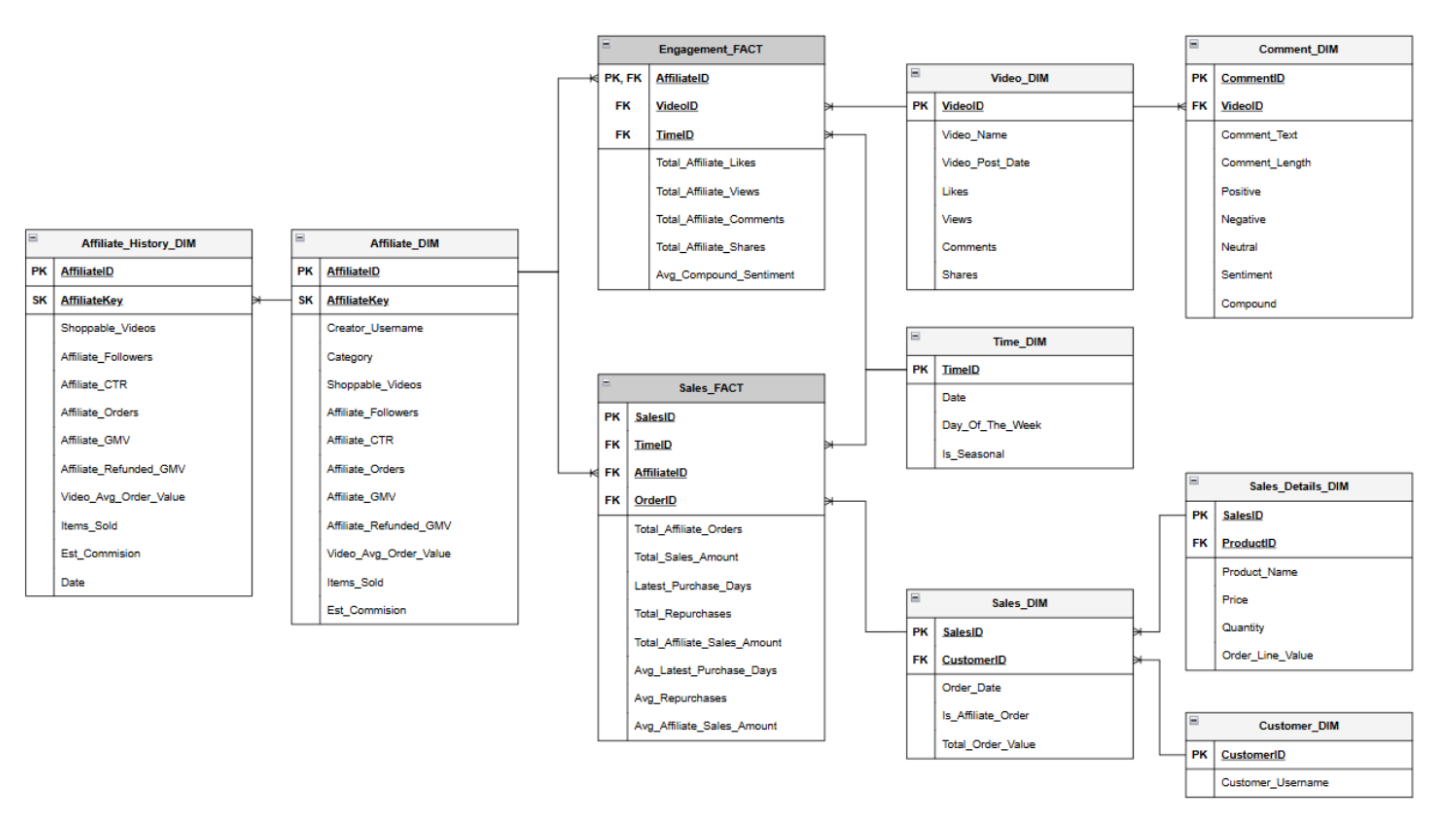

# INSTALLATION

In [ ]:
# pip installation

In [ ]:
# import python packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

# EXTRACT

Extract CSV or XLSX files coming from TikTok analytics and Apify

*NOTE: each dataframe (df) represents a DIM table

In [ ]:
# read csv/xlsx files into pd dataframes
df = pd.read_csv('.csv') # for CSV files
df = pd.read_excel('.xlsx') # for excel files

In [ ]:
# combine all csv files to respective dataframe
# for example: csv files for video data from october to december will be merged into one video_df

"""
There are 3 ways:
  1. Follow the steps from the ML study jam we attended (uses SQL in python)

  2. Follow the steps here (needs access to the directory folder of your laptop where the CSV files are kept)
  https://medium.com/@harryfry/combining-multiple-csv-files-into-one-with-pandas-97f631d67960

  3. Use PostgreSQL instead to combine tables

"""

In [ ]:
# Create Time__DIM dataframe

# Create a range of dates
date_range = pd.date_range(start='2024-10-04', end='2024-12-04')  # change range as needed

# Create DataFrame
df = pd.DataFrame({
    'date': date_range,
    'day_of_week': date_range.day_name()
})

In [ ]:
# check first few rows of each table
df.head()

# TRANSFORM

Clean each data frame to ensure data quality and consistency (haha.. each data frame.....)


NOTE: feel free to do EDA here to check patterns, trends, and outliers! i just dont know where to put those codes :0

In [ ]:
# dataset info
df.info()

In [ ]:
# drop rows with blank IDs
df = df.dropna(subset=['id'])

In [ ]:
# remove duplicates
df = df.drop_duplicates()

In [ ]:
# Drop unnecessary columns
df = df.drop(columns=['column1','column2','column3'])

In [ ]:
# Rename columns
df = df.rename(columns={'old_column1': 'new_column1', 'old_column2': 'new_column2',})

In [ ]:
# Reformat data to its proper data types
df['string_column'] = df['string_column'].astype(int) # string to int
df['int_column'] = df['int_column'].astype(str) # int to string
df['int_column'] = df['int_column'].astype(float) # int to float
df['float_column'] = df['float_column'].astype(int) # float to int
df['date_column'] = pd.to_datetime(df['date_column']) # string to date

In [ ]:
# round off float values to 2 decimal places (if u want lng nmn)
df['float_column'] = df['float_column'].round(2)

In [ ]:
# dataset descriptive statistics
df.describe()

In [ ]:
# check outliers by creating a box plot on the most essential numerical numbers

# Create box plot (EXAMPLE)
plt.boxplot(df['Likes'])
plt.title('Box Plot of Likes')
plt.ylabel('Likes')
plt.show()

In [ ]:
# if there's an outlier, i think this is where we normalize it with z-score or IQR

# not sure about this because i got this from chatGPT

# z-score normalization
scaler = StandardScaler()
df['z_score'] = scaler.fit_transform(df[['Likes']])

# IQR normalization
scaler = RobustScaler()
df['iqr_scaled'] = scaler.fit_transform(df[['values']])

In [ ]:
# recheck outliers using box plot :3

# Create box plot (EXAMPLE)
plt.boxplot(df['Likes'])
plt.title('Box Plot of Likes')
plt.ylabel('Likes')
plt.show()

In [ ]:
# Assign IDs in case IDs dont exist
df['id'] = range(1, len(df) + 1) # count starts from 1 but feel free to configure this!

In [ ]:
# Add binary indicators (this is for Is_Affiliate_Order and Is_Seasonal)

"""
Is_Affiliate_Order
  0: the customer did not place an order through affiliate link
  1: the customer placed an order through affiliate link

Is_Seasonal
  0: Date does not occur on a peak season
  1: Date does occure on a peak season

Peak season: [insert date range]
"""

In [ ]:
# show first few rows of the tables again to make sure the columns and data type align with the DIM tables defined in the BIPROJ1 paper
df.head()

# LOAD

Load transformed data to target database: PostgreSQL
source: https://dev.to/24mwangi/python-etl-creating-and-automating-a-pipeline-from-mysql-to-postgresql-4b0g

I'll send the finalized SQL script tonight :DD

In [ ]:
# First! save this into a GDrive folder as CSV files :DD

In [ ]:
# This block of code comes from the source i got online but we can configure this

# loading the df into the target database tables
def execute_values(conn, df, table):

    tuples = [tuple(x) for x in df.to_numpy()]

    cols = ','.join(list(df.columns))
    # SQL query to execute
    query = "INSERT INTO %s(%s) VALUES %%s" % (table, cols)
    try:
        extras.execute_values(cur2, query, tuples)
        conn2.commit()
    except (Exception, psycopg2.DatabaseError) as error:
        print("Error: %s" % error)
        conn.rollback()
        return 1
    print("-------data updated/inserted into table----",table)

execute_values(conn2, df1,'product_demand')
execute_values(conn2, df2,'toporders')
execute_values(conn2, df3,'customer_spending')

# close connections for postgresql
conn2.close()

you may check out these alternatives as well:

https://medium.com/@DataSpace.NG/building-an-etl-pipeline-with-python-and-postgresql-for-data-loading-3750be1cfcdf

https://resagratia.com/resources/datadigest/data-pipelines-design-with-postgresql-and-python

In [ ]:
# For fact tables....
"""
Here's a theory:
We can try to load the data to Postgre and we can create a trigger in PostgreSQL that if new data is inserted into the table,
it will begin calculating aggregates then insert them into the fact table

wanna give this a shot?
"""